# Loading Fashion-mnist Dataset 

In [1]:
import sys
sys.path.append('e:/hcmus/5th-semester/pattern-recognition/prml-lab/PRML-Lab01-classification-with-machine-learning/utils')

In [2]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Data Processing and Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Quick check dataset

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [5]:
print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of X_test: {type(X_test)}")
print(f"Type of X_test: {type(X_test)}")

Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>


In [6]:
print(f"Data type of X_train: {X_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

Data type of X_train: uint8
Data type of y_train: uint8


In [7]:
print("Image dimensions in X_train:", X_train.shape[1:])

Image dimensions in X_train: (784,)


### 2. Show sample image

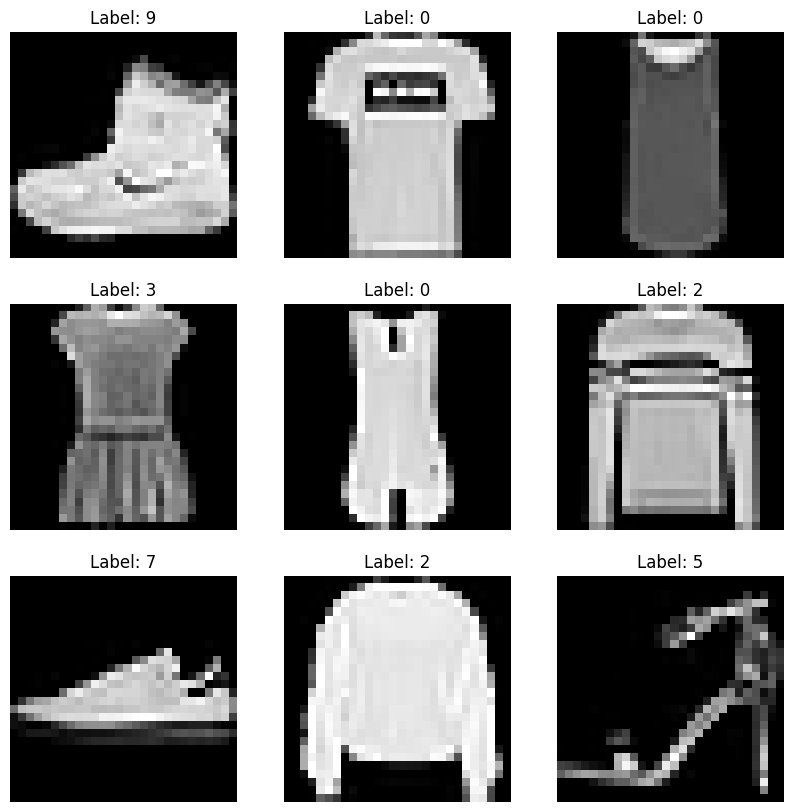

In [8]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### 3. Handle Missing Data

In [9]:
print(f'Number of NaNs in training data: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in testing data: {np.isnan(X_test).sum()}')

Number of NaNs in training data: 0
Number of NaNs in testing data: 0


In [10]:
unique, counts = np.unique(y_train, return_counts=True)
print(f'Label distribution: {dict(zip(unique, counts))}')

Label distribution: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


### 4. Explore Data Characteristics

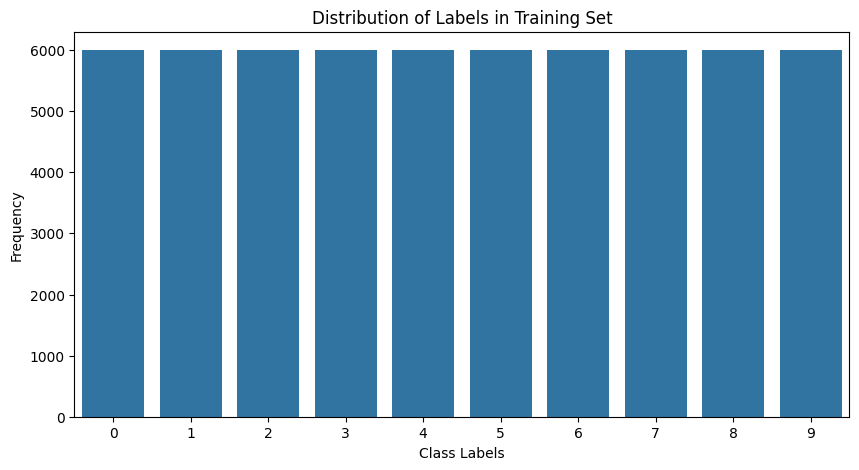

In [11]:
y_train_df = pd.DataFrame(y_train, columns=['Labels'])

plt.figure(figsize=(10, 5))
sns.countplot(x='Labels', data=y_train_df)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

In [12]:
print(f'Mean pixel value: {X_train.mean()}')
print(f'Standard deviation: {X_train.std()}')


Mean pixel value: 72.94035223214286
Standard deviation: 90.02118235130519


### 5. Perform Data Transformation

In [13]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [14]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

### 6. Visualize Data Relationship

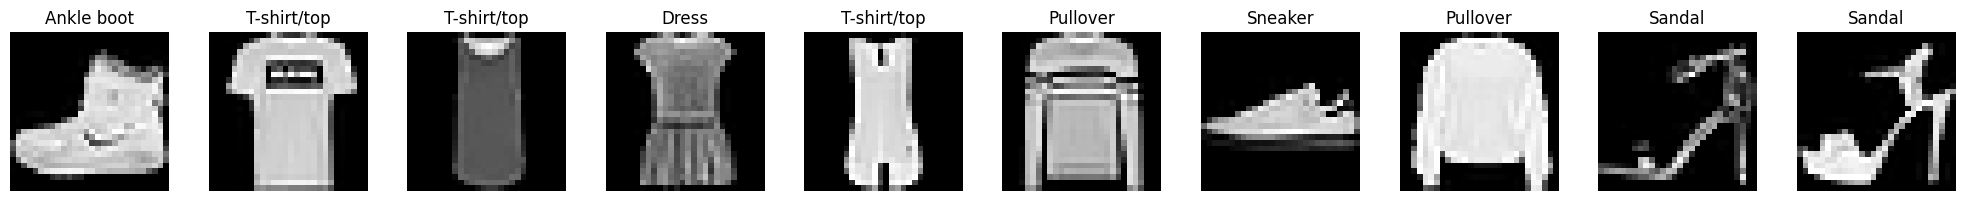

In [15]:
import matplotlib.pyplot as plt

def plot_samples(X, y, classes, num_samples=10):
    plt.figure(figsize=(num_samples * 2, 2)) 
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(classes[y[i]], fontsize=12) 
        plt.axis('off')
    plt.tight_layout()  
    plt.show()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_samples(X_train, y_train, classes)


### 7. Handling Outlier

In [16]:
from scipy import stats

In [17]:
z_scores = np.abs(stats.zscore(X_train))
outliers = np.where(z_scores > 3)
print("Outliers (by Z-score):", X_train[outliers])


Outliers (by Z-score): [0.6745098  0.25882354 0.8980392  ... 0.99215686 0.39607844 0.92156863]


In [18]:
Q1 = np.percentile(X_train, 25)
Q3 = np.percentile(X_train, 75)
IQR = Q3 - Q1

outliers_iqr = X_train[(X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))]

print("Outliers (by IQR):", outliers_iqr)

Outliers (by IQR): []


# Dataset Division

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')


Train set shape: (48000, 28, 28, 1), Train labels shape: (48000,)
Validation set shape: (12000, 28, 28, 1), Validation labels shape: (12000,)
